In [ ]:
'''
This notebook is purely used for visualizing the results of the experiment :)
'''

'\nThis notebook is purely used for visualizing the results of the experiment :)\n'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
import csv
import math

import tqdm
from tqdm import tqdm

from PIL import Image

In [ ]:
dirname = '/content/drive/MyDrive/CS 199/Cell Images/'

In [ ]:
labels = pd.read_csv(dirname + 'bbbc021_labels.csv', index_col=0)
labels

,compound,concentration,moa,plate,well,replicate
0,cytochalasin B,10.0,Actin disruptors,Week1_22123,B04,1
1,cytochalasin B,10.0,Actin disruptors,Week1_22123,B04,1
2,cytochalasin B,10.0,Actin disruptors,Week1_22123,B04,1
3,cytochalasin B,10.0,Actin disruptors,Week1_22123,B04,1
4,cytochalasin B,10.0,Actin disruptors,Week1_22123,B04,1
...,...,...,...,...,...,...
4695,ALLN,100.0,Protein degradation,Week2_24161,D03,3
4696,ALLN,100.0,Protein degradation,Week2_24161,D03,3
4697,ALLN,100.0,Protein degradation,Week2_24161,D03,3
4698,ALLN,100.0,Protein degradation,Week2_24161,D03,3


In [ ]:
# Load images
Image = []
for image in os.listdir(dirname + 'TRAINING SET'):
  Image.append(os.path.join(dirname + 'TRAINING SET', image))

In [ ]:
# Arranging files with their file number
number = Image.copy()
for i in range(0, len(number)):
  number[i] = number[i].replace('/content/drive/MyDrive/CS 199/Cell Images/TRAINING SET/bbbc021_', '')
  number[i] = number[i].replace('.png', '')
  number[i] = int(number[i])

Image_number = dict(zip(Image, number))
Image_number = sorted(Image_number, key = Image_number.get)
labels['image'] = Image_number

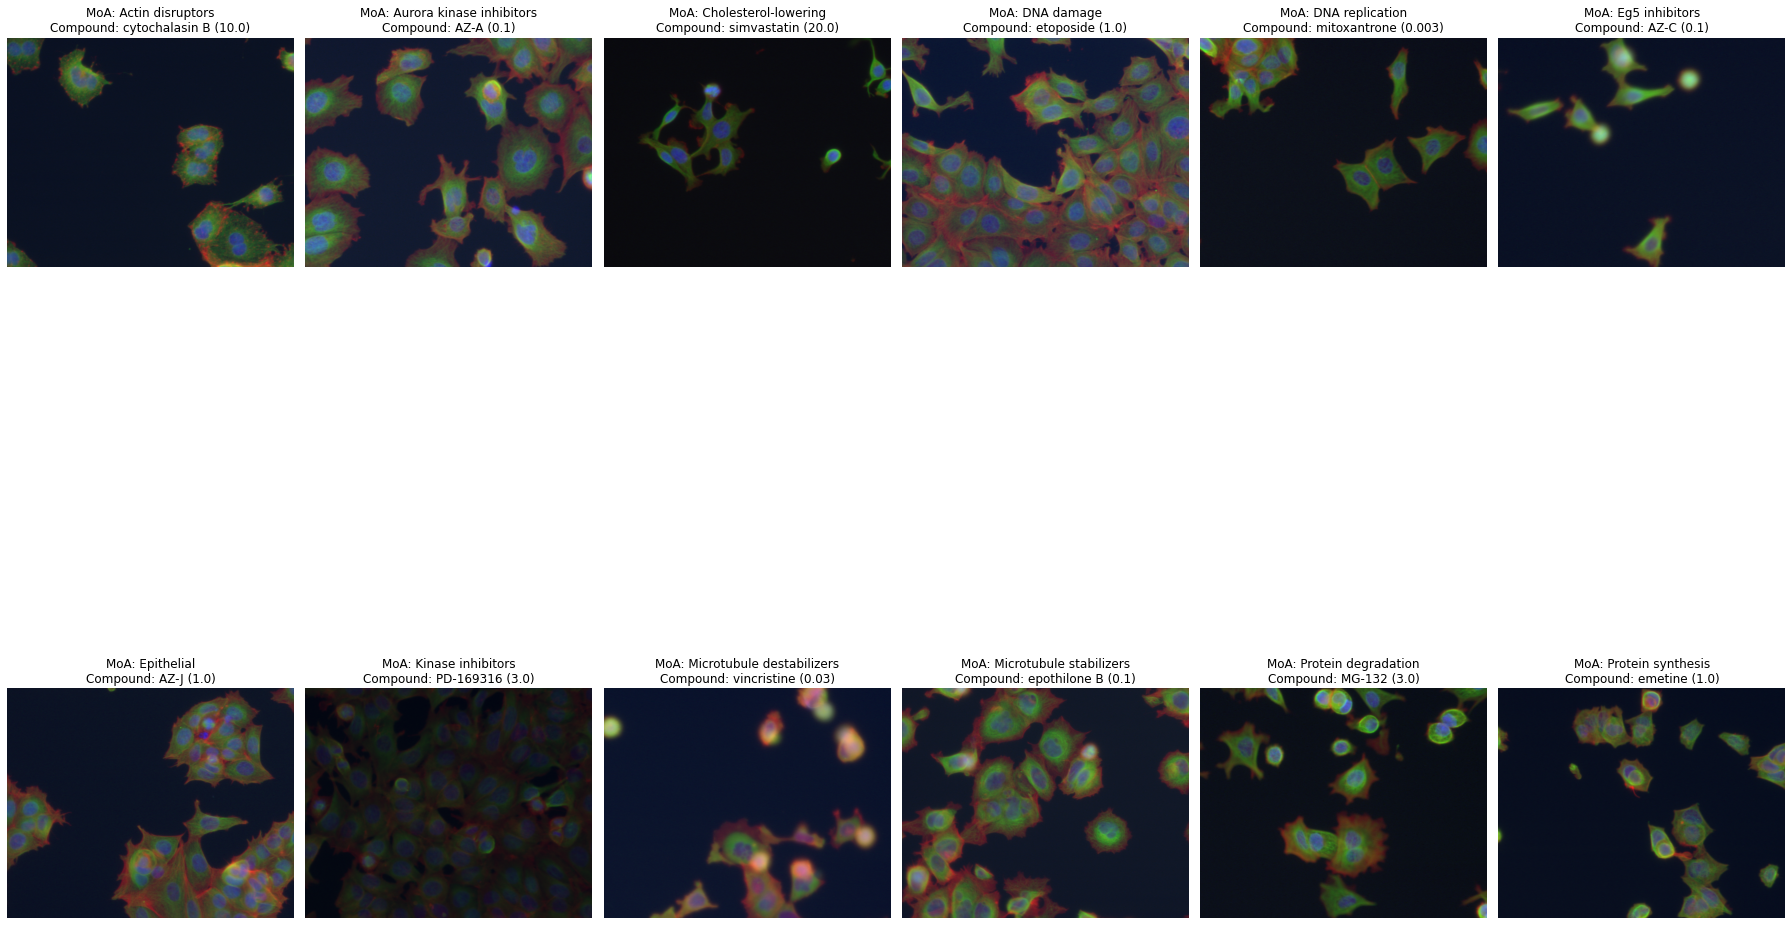

In [ ]:
# Preview Image
fig, ax = plt.subplots(nrows = 2, ncols =6 , figsize = (25,25))

rand = labels.groupby(['moa']).sample(1).reset_index()
c = 0

for i in range(0,2):
  for j in range(0,6):
    ax[i,j].imshow(plt.imread(rand['image'].iloc[c]))
    ax[i,j].axis('off')
    ax[i,j].set_title("MoA: " + rand['moa'].iloc[c] + '\n' + 
                     "Compound: " + rand['compound'].iloc[c] +
                     " (" + str(rand['concentration'].iloc[c]) + ")"
                      )
    c = c+1

fig.tight_layout()
fig.subplots_adjust(top=0.95)

In [ ]:
# Count each occurence of Compound in dataset
summary = pd.DataFrame({#"Compounds": labels['compound'].unique(), 
                        "Number of Images": labels['compound'].value_counts(),
                        "Number of Concentrations": labels.groupby('compound')['concentration'].nunique(),
                        "Mechanism of Action": labels.groupby('compound').first()['moa']
                        #"Concentration": labels
                        })

In [ ]:
summary

,Number of Images,Number of Concentrations,Mechanism of Action
ALLN,96,2,Protein degradation
AZ-A,288,6,Aurora kinase inhibitors
AZ-C,336,7,Eg5 inhibitors
AZ-J,141,3,Epithelial
AZ-U,144,3,Epithelial
AZ138,239,5,Eg5 inhibitors
AZ258,144,3,Aurora kinase inhibitors
AZ841,144,3,Aurora kinase inhibitors
MG-132,94,2,Protein degradation
PD-169316,63,2,Kinase inhibitors


In [ ]:
print(summary.to_latex())

\begin{tabular}{lrrl}
\toprule
{} &  Number of Images &  Number of Concentrations &        Mechanism of Action \\
\midrule
ALLN                   &                96 &                         2 &        Protein degradation \\
AZ-A                   &               288 &                         6 &   Aurora kinase inhibitors \\
AZ-C                   &               336 &                         7 &             Eg5 inhibitors \\
AZ-J                   &               141 &                         3 &                 Epithelial \\
AZ-U                   &               144 &                         3 &                 Epithelial \\
AZ138                  &               239 &                         5 &             Eg5 inhibitors \\
AZ258                  &               144 &                         3 &   Aurora kinase inhibitors \\
AZ841                  &               144 &                         3 &   Aurora kinase inhibitors \\
MG-132                 &                94 &         

# Predictions

In [ ]:
predictions = pd.read_excel('/content/drive/MyDrive/CS 198 Research Data/predictions_bbbc021v1.xlsx', sheet_name=2)

In [ ]:
# Filling NaN values
pred_fill = predictions.fillna(method='ffill')

In [ ]:
pred_fill

,Compounds,MoA,Concentrations,Act,Aur,Ch,Eg5,Epi,KI,MD,MS,PD,PS,DR,DD
0,PP-2,Epithelial,3.0,0.005261,0.000176,0.043442,0.001991,0.798313,0.000389,0.001768,0.000482,0.004097,0.019404,0.006814,0.000336
1,PP-2,Epithelial,10.0,0.005785,0.001283,0.150579,0.003305,0.489811,0.001119,0.003070,0.001184,0.019195,0.018222,0.095782,0.004689
2,AZ-J,Epithelial,1.0,0.000317,0.000018,0.000630,0.000086,0.996297,0.000128,0.000137,0.000030,0.000060,0.000464,0.000040,0.000044
3,AZ-J,Epithelial,3.0,0.000622,0.000023,0.000310,0.000233,0.995160,0.000034,0.000068,0.000021,0.000127,0.002876,0.000015,0.000021
4,AZ-J,Epithelial,10.0,0.000133,0.000009,0.000039,0.000051,0.998453,0.000027,0.000049,0.000008,0.000041,0.000213,0.000012,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,cytochalasin B,Actin disruptors,10.0,0.996200,0.000099,0.000106,0.000188,0.000267,0.000026,0.000314,0.000181,0.000777,0.000340,0.000049,0.000075
99,cytochalasin B,Actin disruptors,30.0,0.962090,0.000461,0.001803,0.001810,0.000974,0.000231,0.006774,0.007928,0.004088,0.001210,0.000718,0.000223
100,latrunculin B,Actin disruptors,1.0,0.098674,0.041863,0.004023,0.010686,0.480215,0.011434,0.009312,0.003510,0.011411,0.054540,0.005430,0.019761
101,latrunculin B,Actin disruptors,3.0,0.994686,0.000006,0.000179,0.000012,0.000254,0.000027,0.000032,0.000034,0.000040,0.001085,0.000004,0.000051


In [ ]:
# Drop rows in predictions that aren't in test set
compound_list = summary.index.to_list()
compound_list

['ALLN',
 'AZ-A',
 'AZ-C',
 'AZ-J',
 'AZ-U',
 'AZ138',
 'AZ841',
 'anisomycin',
 'cytochalasin B',
 'cytochalasin D',
 'etoposide',
 'floxuridine',
 'methotrexate',
 'mitoxantrone',
 'nocodazole',
 'simvastatin',
 'taxol',
 'vincristine']

In [ ]:
lol = pred_fill[pred_fill['Compounds'].isin(compound_list)]
lol

,Compounds,MoA,Concentrations,Act,Aur,Ch,Eg5,Epi,KI,MD,MS,PD,PS,DR,DD
2,AZ-J,Epithelial,1.000,3.169399e-04,1.751806e-05,0.000630,8.577471e-05,9.962968e-01,1.282223e-04,1.372743e-04,2.967810e-05,6.012758e-05,4.635892e-04,3.976993e-05,4.422993e-05
3,AZ-J,Epithelial,3.000,6.218668e-04,2.335985e-05,0.000310,2.333643e-04,9.951604e-01,3.428584e-05,6.792066e-05,2.135217e-05,1.271667e-04,2.875787e-03,1.547557e-05,2.144368e-05
4,AZ-J,Epithelial,10.000,1.326944e-04,8.948734e-06,0.000039,5.094298e-05,9.984529e-01,2.710845e-05,4.926652e-05,7.619579e-06,4.060360e-05,2.125342e-04,1.226909e-05,1.933703e-05
5,AZ-U,Epithelial,1.000,3.893388e-04,3.022905e-06,0.000138,2.678920e-05,9.967496e-01,1.587542e-04,3.369171e-05,1.696496e-05,6.082056e-05,1.455744e-03,5.614421e-06,1.412232e-05
6,AZ-U,Epithelial,3.000,1.245089e-04,1.633513e-06,0.000022,1.866735e-05,9.979243e-01,3.901711e-05,3.546626e-05,8.393250e-06,5.729068e-05,1.603976e-03,2.827002e-06,3.181722e-06
7,AZ-U,Epithelial,10.000,2.076973e-04,6.421046e-07,0.000037,5.683421e-06,9.994096e-01,1.977092e-05,2.971886e-05,1.082041e-06,7.125141e-06,2.201273e-04,2.856463e-06,2.032162e-06
9,vincristine,Microtubule destabilizers,0.003,3.687756e-02,1.552568e-03,0.000992,2.547317e-02,4.294607e-03,8.963236e-03,7.415728e-01,9.755505e-03,6.177740e-03,2.897163e-03,1.509695e-03,3.372429e-03
10,vincristine,Microtubule destabilizers,0.010,8.102212e-03,1.882376e-03,0.000548,1.230270e-02,2.346142e-03,4.921635e-03,8.453439e-01,6.188120e-03,3.985402e-03,6.750977e-04,5.078546e-03,1.775470e-03
11,vincristine,Microtubule destabilizers,0.030,1.557995e-03,7.631428e-04,0.000073,1.822453e-02,8.392868e-04,1.966926e-03,9.563349e-01,4.052832e-03,1.848665e-03,4.387920e-04,6.874994e-04,1.307394e-03
12,vincristine,Microtubule destabilizers,0.100,9.365944e-03,1.084134e-03,0.002551,1.686184e-02,2.583275e-03,2.471566e-03,8.536855e-01,4.673560e-03,4.846980e-03,1.087504e-03,6.816180e-03,1.085084e-03


In [ ]:
# Make values in percentage
rounded = lol.style.format({
    'Concentrations': '{:,.3f}'.format,
    'Act': '{:,.2%}'.format,
    'Aur': '{:,.2%}'.format,
    'Ch': '{:,.2%}'.format,
    'Eg5': '{:,.2%}'.format,
    'Epi': '{:,.2%}'.format,
    'KI': '{:,.2%}'.format,
    'MD': '{:,.2%}'.format,
    'MS': '{:,.2%}'.format,
    'PD': '{:,.2%}'.format,
    'PS': '{:,.2%}'.format,
    'DR': '{:,.2%}'.format,
    'DD': '{:,.2%}'.format,
}).data

In [ ]:
# Create tables for each compound
lol.loc[lol['Compounds'] == 'AZ-J']


,Compounds,MoA,Concentrations,Act,Aur,Ch,Eg5,Epi,KI,MD,MS,PD,PS,DR,DD
2,AZ-J,Epithelial,1.0,0.000317,0.000018,0.000630,0.000086,0.996297,0.000128,0.000137,0.000030,0.000060,0.000464,0.000040,0.000044
3,AZ-J,Epithelial,3.0,0.000622,0.000023,0.000310,0.000233,0.995160,0.000034,0.000068,0.000021,0.000127,0.002876,0.000015,0.000021
4,AZ-J,Epithelial,10.0,0.000133,0.000009,0.000039,0.000051,0.998453,0.000027,0.000049,0.000008,0.000041,0.000213,0.000012,0.000019


In [ ]:
import seaborn as sns
%matplotlib inline

for compound in compound_list:
  # Filter compounds
  filtered = lol.loc[lol['Compounds'] == compound].reset_index(drop=True)
  moa = filtered['MoA'].iloc[0]

  # Drop columns
  filtered = filtered.drop(['Compounds', 'MoA'], axis=1)

  # Get X and Y axis labels
  col_headers = list(filtered)
  filtered = filtered.set_index('Concentrations')

  # Create seaborn table
  
  sns.set(rc={'figure.figsize':(11,6)})
  sns.heatmap(filtered, annot=True, fmt = '.2%', cbar=False)
  plt.title('Compound: ' + compound + '\n' + 'Mechanism of Action: ' + moa)

  plt.savefig('/content/drive/MyDrive/CS 198 Research Data/Model Prediction Pictures/' + compound + '.png')
  plt.clf()

<Figure size 792x432 with 0 Axes>

# DRAFT CODE


### Helper Functions


In [ ]:
#@title
# Helper functions
def class_weights(compound):
    y_train = moa[np.where(compounds != compound)[0]]
    y_train = np.asarray([moa_dict[item] for item in y_train])
    y_train = convert_to_one_hot(y_train, 12)
    weights = np.array(list((y_train.shape[0]/(y_train.shape[1]*np.array([y_train[:,i].sum() for i in range(y_train.shape[1])])))))
    class_weights_dict = {}
    for i in range(len(weights)):
        class_weights_dict[i] = weights[i]
    return class_weights_dict

def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y]
    return Y

def smooth_labels(labels, eps):
    n_classes = labels.shape[0]
    return labels * (1 - eps) + (1 - labels) * eps / (n_classes - 1.0)

def load_test_set(compound, dims):
    height, width, channels = dims
    # Prepare test set
    test_index  = np.where(compounds == compound)[0]

    Y_test = moa[test_index]
    Y_test = np.asarray([moa_dict[item] for item in Y_test])
    Y_test = convert_to_one_hot(Y_test, 12)

    X_test = np.zeros((len(test_index), height, width, channels))
    for j,i in enumerate(test_index):
        # reading images with cv2 will make "RGB" into "BGR"
        image_test = cv2.imread(path + "%s.png" % str(i))
        resized_image_test = cv2.resize(image_test, (height, width), interpolation=cv2.INTER_AREA)
        #resized_image_test = resized_image_test.astype(np.float32)
        #resized_image_test /= 127.5
        #resized_image_test -= 1.
        X_test[j] = resized_image_test#cv2.imread(path + "%s.png" % str(i))

    return X_test, Y_test

def noisy(image):
    row,col,ch= image.shape
    image = image.astype(np.float32)

    for i in range(ch):
        jitter_percent = np.random.choice([0., 0., .25, -.25])
        image[:,:,i] *= (1 - jitter_percent)
    if np.random.choice([0,1]) == 1:
        filter_size = 3
        image = cv2.blur(image,(filter_size,filter_size))
    if np.random.choice([0,1]) == 1:
        var   = 50
        sigma = var**0.5
        mean  = 0
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        image += gauss

    image[image < 0] = 0
    image[image > 255] = 255

    return image

def randomize_func(*args):
    return np.random.choice(args)

def img_preprocess(i, index, dims):

    nor_0   = lambda x: x
    nor_90  = lambda x: np.rot90(x, k=1)
    nor_180 = lambda x: np.rot90(x, k=2)
    nor_270 = lambda x: np.rot90(x, k=3)

    mir_0   = lambda x: np.fliplr(x)
    mir_90  = lambda x: np.rot90(np.fliplr(x), k=1)
    mir_180 = lambda x: np.rot90(np.fliplr(x), k=2)
    mir_270 = lambda x: np.rot90(np.fliplr(x), k=3)

    height, width, _ = dims

    image = cv2.imread(path + "%s.png" % index[i])
    resized_image = cv2.resize(image, (height, width), interpolation=cv2.INTER_AREA)
    func = randomize_func(nor_0, nor_90, nor_180, nor_270, mir_0, mir_90, mir_180, mir_270)
    transformed_image = func(resized_image)
    transformed_image = noisy(transformed_image)
    #transformed_image = transformed_image.astype(np.float32)
    #transformed_image /= 127.5
    #transformed_image -= 1.
    return transformed_image

def generator(index, classes, batch_size, dims):
    height, width, channels = dims
    # Create empty arrays to contain batch of features and labels#
    batch_features = np.zeros((batch_size, height, width, channels))
    batch_labels = np.zeros((batch_size, classes))
    np.random.shuffle(index)
    i = 0
    while True:
        for j in range(batch_size):
            if i == index.shape[0]:
                i = 0
                np.random.shuffle(index)
            # Read and pre process image
            transformed_image = img_preprocess(i, index, dims)
            batch_features[j] = transformed_image
            # Assign label i corresponding to i:th index, then convert to one-hot.
            label = moa_dict[labels.iloc[index[i], 2]]
            label = convert_to_one_hot(label, classes)
            #label = smooth_labels(label, 0.1)
            batch_labels[j] = label
            #smooth_labels(label, eps)
            i += 1

        yield batch_features, batch_labels


def treatment_prediction(compound, probs):
    test_index  = np.where(compounds == compound)[0]
    conc_unique = list(set(concentrations[test_index]))
    repl_unique = list(set(replicates[test_index]))

    n_conc = len(conc_unique)
    predictions   = np.zeros((n_conc,), dtype="uint8")
    probabilities = np.zeros((n_conc, 12))

    for i, conc in enumerate(conc_unique):
        n_repl = len(repl_unique)
        sub_preds_median = np.zeros((n_repl, 12))

        for j, repl in enumerate(repl_unique):
            test_repl = np.where((replicates[test_index] == repl) & (concentrations[test_index] == conc))[0]

            if test_repl.shape[0] > 0:
                sub_pred = np.array(probs)[test_repl]
                sub_preds_median[j,:] = np.median(sub_pred, axis=0)

        predictions[i] = np.argmax(np.median(np.array(sub_preds_median), axis=0), axis=0)
        probabilities[i] = np.median(np.array(sub_preds_median), axis=0)

    return predictions, probabilities, conc_unique

## Model Building

In [ ]:
#@title
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import InputLayer, Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input

from keras.callbacks import CSVLogger
from keras.callbacks import LearningRateScheduler

In [ ]:
#@title
# Creating model with pre trained imagenet weights
model = InceptionResNetV2(include_top = False, weights='imagenet', input_shape=(299, 299, 3)) # Resize images to 299 x 299

In [ ]:
#@title
# We dont want to train all layers so, we do following step because we are using same weights given in VGG16
for layers in model.layers:
    layers.trainable = False

In [ ]:
#@title
from keras import regularizers
#x = Flatten()(model.output)
x = GlobalAveragePooling2D(name='avg_pool')(model.output)
x = Dense(12, kernel_regularizer=regularizers.l2(0.0), activation='softmax', name='predictions')(x)

In [ ]:
#@title
model = Model(inputs = model.input, outputs = x)

In [ ]:
#@title
model.compile(optimizer = 'Adam', 
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# Fit Model

In [ ]:
#@title
def model_fit(model, compound):
        labels = pd.read_csv(dirname + 'bbbc021_labels.csv', index_col=0)

        with open(r'predictions_inception_resnet_v2.csv', 'a') as f:
            writer = csv.writer(f)
            writer.writerow([compound, labels['moa'][labels['compound'] == compound].iloc[0]])

        # learning rate schedule
        def step_decay(epoch):
            """
            Learning rate schedule.
            """
            initial_lrate = 0.0001
            drop = 0.5
            epochs_drop = 100
            lrate = initial_lrate * math.pow(drop, math.floor((epoch)/epochs_drop))

            return lrate

        csv_logger     = CSVLogger('inception_resnet_v2_training.log', append=True)
        lrate          = LearningRateScheduler(step_decay, verbose=1)

        callbacks_list = [lrate, csv_logger]
        

        index      = np.where(labels['compound'] != compound)[0]
        # Calculate class weights
        class_weight = class_weights(compound)
        # Step size (usually input rows divided by batch size)
        steps      = index.shape[0]/8
        # Fit model
        model.fit_generator(generator(index, 12, 8, dims=(299, 299, 3)),
                            steps_per_epoch=steps,
                            class_weight=class_weight,
                            epochs=1,
                            verbose=1,
                            max_queue_size=4,
                            callbacks=callbacks_list)
        return model

# Predict Model

In [ ]:
#@title
def predict_model(model, compound):
        X_test, Y_test = load_test_set(compound,  dims=(299,299,3))
        # Predict test set and obtain probabilities
        softmaxProbs = model.predict(X_test, batch_size=8)

        # Input probabilities and calculate prediction;
        # first: element wise median of the different fields of view,
        # second: element wise median of the replicates.
        # third: element with highest value is the hardPreds
        hardPreds, softPreds, uniqueConc = model_utils.treatment_prediction(compound, softmaxProbs)

        #print("Accuracy = " + str(preds))
        with open(r'predictions_inception_resnet_v2.csv', 'a') as f:
            writer = csv.writer(f)
            writer.writerow(uniqueConc)
            #writer.writerow((hardPreds == np.argmax(Y_test[0])))
            for i in range(len(uniqueConc)):
                writer.writerow(softPreds[i])

        return

# Run Model

In [ ]:
#@title
for compound in compounds:
  trained_model = model_fit(model, compound)
  predict_model(trained_model, compound)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '



Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
579/579 [==============================] - 2650s 5s/step - loss: nan - accuracy: 0.0514


IndexError: ignored